# Images to Text: A Gentle Introduction to Optical Character Recognition with PyTesseract

***Lesson 02: OCR as a Process*** 

Wednesday, June 16 2021 - [13:00-14:30 UTC](https://savvytime.com/converter/utc/jun-16-2021/13-30)

## Table of Contents

- [Review of Lesson 01](#lesson-01)
- [Lesson 02: OCR as a Process](#lesson-02)
    - [Choosing OCR](#choosing)
    - [Preparing a Corpus](#preparing)
    - [Pre-Processing](#pre-processing)
    - [Performing OCR](#performing)
    - [Post-Processing](#post-processing)
- [Homework](#homework)
- [Resources](01-WhatIsOCR.ipynb#resources)

## Learning Objectives

<div class="alert alert-block alert-info">
    <strong>By the end of this lesson, participants should be able to</strong>
    <ul>
        <li>describe and implement an OCR workflow including pre- and post-processing steps;</li>
        <li>explain the importance of performing adjustments (pre-processing) to inputs before running OCR;</li>
        <li>identify possible technical challenges presented by specific texts and propose potential solutions;</li>
        <li>assess the degree of accuracy they have achieved in performing OCR.</li>   
    </ul>
</div>

## Review of Lesson 01: What is OCR? Why is it important?<a class="anchor" id="lesson-01"></a>
---

- What we covered in [Lesson 01](01-WhatIsOCR.ipynb)
- Slack Discussion
    - [How to Install & Run Jupyter Notebooks Locally](04-Installing%2BRunningLocally.ipynb)
- New Questions

## Lesson 02: OCR Options & as a Process <a class="anchor" id="lesson-02"></a>
---

**Before we get started, we'll need to reinstall Tesseract and import PIL and Pytesseract.** Run each script below, waiting for the first to finish before running the second.

In [ ]:
# Install tesseract on Binder.
# The exclamation runs the command as a terminal command.
# This may take 1-2 minutes.
# Source: Nathan Kelber & JStor Labs Constellate team.
!conda install -c conda-forge -y tesseract

<mark style="background-color:pink"><strong>UPDATE:</strong></mark> If you're running this in Binder, you may need to run the following commands to pull in an additional missing Tesseract file and move it to the correct location in your Binder environment:

In [ ]:
!wget https://github.com/tesseract-ocr/tessdata/raw/master/eng.traineddata
!mv eng.traineddata /srv/conda/envs/notebook/share/tessdata/eng.traineddata

After Tesserct is fully installed, run the following to import Pillow and Pytesseract.

In [ ]:
# Import the Image and ImageOps modules 
# from the Pillow Library, which will help us access the image.
from PIL import Image
from PIL import ImageOps

# Import the pytesseract library, which will run the OCR process.
import pytesseract

print('Modules successfully installed.')

### [From Lesson 01](01-WhatIsOCR.ipynb#variations) -  Variations on a Theme: Tesseract's Options

Tesseract offers a number of different modes, or settings, that we can use to customize output. There are two types of modes: OEMs (OCR Engine Modes), which specify which OCR tools are available to Tesseract to use, and PSMs (Page Segmentations Modes), which specify how the OCR tools should read the image files--how to separate and order sections of text in the image file.

#### OCR Engine Modes (OEMs)

Run the following command to view the list of OEMs.

In [ ]:
!tesseract --help-oem

Run the following script, trying each of the different OEMs in turn replace the number (X) in the first line to change the OEM: 

`custom_oem_config = r'--oem X`

In [ ]:
# Change the OEM number below to try
# running another OCR mode.
# 3 is the default setting.
custom_oem_config = r'--oem X'

# Open a specific image file, convert the text in the image to computer-readable text (OCR)
# following the language and mode configuration we specify,
# and then print the results for us to see here.
print(pytesseract.image_to_string(Image.open("sessionlawsresol1955nort_0057.jpg"), lang="eng", config=custom_oem_config))

*What did you notice about the different modes? How did they differ from one another?*

Here's more of an explanation of OCR Engine Modes (OEMs):

- *0 - Original Tesseract only.* - This mode runs only the main Tesseract mode.
  
- *1 - Cube only.* - This mode runs only Cube, [according to Google](https://code.google.com/archive/p/tesseract-ocr-extradocs/wikis/Cube.wiki), "an alternative recognition mode for Tesseract. It is slower than the original recognition engine, but often produces better results." [A Nanonets tutorial explains](https://nanonets.com/blog/ocr-with-tesseract/) that this is the LSTM mode. There is not much documentation out about this.
  
- *2 - Tesseract + Cube.* - Both Tesseract (Nanonets refers to this as "Legacy") and Cube (LSTM) modes are used.

- *3 - Default, based on what is available.* - Tesseract will choose an OEM based on the configurations (language, PSM) we give it. Even if we don't include the configuration information, Tesseract will run in OEM 3.

#### Page Segmentation Modes (PSM)

Run the following command to view all of the PSMs:

In [ ]:
!tesseract --help-psm

This time, our configuration looks like

`custom_oem_config = r'--psm X'`

In [ ]:
# Change the PSM number below to try
# running another page segmentation mode.
# 3 is the default setting.
custom_psm_config = r'--psm 3'

# Open a specific image file, convert the text in the image to computer-readable text (OCR)
# following the language and mode configuration we specify,
# and then print the results for us to see here.
print(pytesseract.image_to_string(Image.open("sessionlawsresol1955nort_0057.jpg"), lang="eng", config=custom_psm_config))

Many of the PSMs are meant for images that have little text in them -- such as images that include road or store signs. [See Tesseract's documentation on improving OCR quality.](https://tesseract-ocr.github.io/tessdoc/ImproveQuality)

**Most of the time, the default OEM and PSM is best.** There may be times when you are working with materials for which experimenting with these options may be useful.

Note that it's possible to customize the `oem` and `psm` together. Here's how:

In [ ]:
# Change the numbers below to try
# running other modes together.
custom_oem_psm_config = r'--oem 3 --psm 4'

# Open a specific image file, convert the text in the image to computer-readable text (OCR)
# following the language and mode configuration we specify,
# and then print the results for us to see here.
print(pytesseract.image_to_string(Image.open("sessionlawsresol1955nort_0057.jpg"), lang="eng", config=custom_oem_psm_config))

#### File Formats

In addition to .txt, Tesseract can convert OCR'ed images into [hOCR (HTML)](https://en.wikipedia.org/wiki/HOCR), searchable PDF, and TSV.

*Exercise*

The scripts below output various file formats. Try each and then click the file link below each script to view the output. You'll also find the files by clicking on the Jupyter icon at the top of this window.

1. Text: Note that this script is more detailed than our initial `print(pytesseract.image_to_string(Image.open("sessionlawsresol1955nort_0057.jpg"), lang="eng"))`. Read through the comments (#) below to learn

In [ ]:
# Name the image file. (Assign it to a variable.)
# You can change the filename in quotes below to OCR a different file.
file = "sessionlawsresol1955nort_0057.jpg"

# Open the file named above. 
# While it's open, do several things:
with open(file, 'rb') as inputFile:
        
    # Read the file using PIL's Image module.
    img = Image.open(inputFile)
    
    # Run OCR on the open file.
    ocrText = pytesseract.image_to_string(img)
        
    # Get a file name--without the extension-- 
    # to use when we name the output file.
    fileName = file.strip('.jpg')

# The image file above will be closed before moving on to this line.
# The OCR'ed text has been pulled from the image and stored in
# a Python variable for us to continue to use.

# Create and open a new text file, name it to match its input file,
# declare its encoding to be UTF-8 so that it correctly outputs
# non-ASCII characters.
with open(fileName + ".txt", "w", encoding="utf-8") as outFile:
        
    # and write the OCR'ed text to the file.
    outFile.write(ocrText)

# Display a message to let us know the file has been created
# and the script successfully completed.
print(fileName, "text file successfully created.")

Open [sessionlawsresol1955nort_0057.txt](sessionlawsresol1955nort_0057.txt) to see the results.

2. PDF:

In [ ]:
# Name the image file. (Assign it to a variable.)
# You can change the filename in quotes below to OCR a different file.
file = "sessionlawsresol1955nort_0057.jpg"

# Get a file name--without the extension-- 
# to use when we name the output file.
fileName = file.strip('.jpg')

# Run OCR on an image file and save it as a PDF object (not file)
# within Python.
pdf = pytesseract.image_to_pdf_or_hocr(file, extension='pdf')

# Create a new empty pdf.
with open(fileName + ".pdf", 'w+b') as f:
    
    # Save the PDF object to the new empty PDF file.
    f.write(pdf)

# Display a message to let us know the file has been created
# and the script successfully completed.
print(fileName, "PDF successfully created.")

Open [sessionlawsresol1955nort_0057.pdf](sessionlawsresol1955nort_0057.pdf) to see the results. *What do you notice about this PDF?* Try running a search within file (Command+F or Control+F to open the Find search box).

In [ ]:
# Name the image file. (Assign it to a variable.)
# You can change the filename in quotes below to OCR a different file.
file = "sessionlawsresol1955nort_0057.jpg"

# Get a file name--without the extension-- 
# to use when we name the output file.
fileName = file.strip('.jpg')

# Run OCR on an image file and save it as an HTML object (not file)
# within Python.
hocr = pytesseract.image_to_pdf_or_hocr(file, extension='hocr')

# Create a new empty HTML file. Open it in "w+b" mode.
# "w+b" is a mode that tells Python to write whatever
# data we give to a file in binary mode--meaning that 
# it will not apply any encoding or try to translate
# a non-ASCII character to an ASCII character.
with open(fileName + ".html", 'w+b') as f:
    
    # Save the PDF object to the new empty PDF file.
    f.write(hocr)

# Display a message to let us know the file has been created
# and the script successfully completed.
print(fileName, "HTML successfully created.")

Open [sessionlawsresol1955nort_0057.html](sessionlawsresol1955nort_0057.html) to see the results. *What do you notice about this HTML file?* If you wish, save it to your Desktop and open in a text editor to view the HTML syntax.

#### Languages

If we do not include `lang="eng"` when we run the above code, Tesseract will *assume* English. Run the following to get a list of all the language codes. [A table of these is available here.](https://tesseract-ocr.github.io/tessdoc/Data-Files-in-different-versions.html)

In [ ]:
# Display a list of languages in their 3-letter codes supported by Tesseract.
print(pytesseract.get_languages(config=''))

*Exercises*

Try OCR'ing [this file](faust.png) ([Source](https://archive.org/details/fausteinetragodi00goet/page/n7/mode/2up)). Change the [3-letter language code](https://tesseract-ocr.github.io/tessdoc/Data-Files-in-different-versions.html) to match the language in that document. *To do this, you will need to modify the code below to include the correct file name and language code.*

In [ ]:
# Open a specific image file, convert the text in the image to computer-readable text (OCR),
# and then print the results for us to see here.

# REPLACE THE FILE NAME with one of the sample files above. (faust.png)
# REPLACE THE LANGUAGE attribute with the correct language code(s). (deu)
print(pytesseract.image_to_string(Image.open("REPLACE-THIS-FILE-NAME.jpg"), lang="lan"))

Try OCR'ing [this file](bible.png) ([Source](https://archive.org/details/holybibleinhindi00alla)), which includes [multiple languages](). The syntax will be `lang="lan+gua"` -- replace `lan` and `gua` with the correct language codes. *The first language will be the "primary" language. Try changing the order of the languages to see how the output changes.*

In [ ]:
import pytesseract

from PIL import Image

# Open a specific image file, convert the text in the image to computer-readable text (OCR),
# and then print the results for us to see here.

# REPLACE THE FILE NAME with one of the sample files above. (bible.png)
# REPLACE THE LANGUAGE attribute with the correct language code(s).
print(pytesseract.image_to_string(Image.open("REPLACE-THIS-FILE-NAME.png"), lang="lan+gua"))

## Lesson 01 Homework Review & Practice <a class="anchor" id="homework-lesson01"></a>
---

*As you work through the following steps, discuss your observations with your small group: what do you notice about the OCR output? How does it vary for different sources/settings? Why do you think the output varies for different sources/settings? What might you need to do to improve the OCR output?*

Use the following code blocks to try OCR'ing various texts. You could use your own files containing digitized texts or locate files to try via [JStor](https://www.jstor.org/), the [Internet Archive](https://archive.org/), [Chronicling America](https://chroniclingamerica.loc.gov/) or other resources. Try texts in different languages, fonts or types, formats, layouts, etc. 

### 1. Upload your selected text(s) to a new folder in your space on Binder:

- Make sure that the texts you select are stored in an image (.jpg, .png, .tiff) format. If you have selected a text with multiple pages, make sure each page is stored in a separate file. *If you have PDF files and are not sure how to generate images from them, bring them to Lesson 02. We'll be looking at how to generate image files together during the lesson.*

- Click the "Jupyter" icon at the top of the browser. (Recommended: right click and select "Open in New Tab.")

- Above the list of files in Jupyter at the top right, click "New" and create a new folder.

- A new "Untitled Folder" will be created. Select the check box to the left of your new folder.

- Click "Rename" at the top left and give your folder a name.

- Click your new folder's name in the list of files and folders.

- In your new folder, select "Upload" in the top right and upload your chosen image file(s).

### 2. Perform OCR on your image file. 

Use the code blocks above or start fresh below. Change the language attribute to match the text's language. Try out the various settings we looked at above.

Below, make sure to replace "FOLDER NAME/FILE NAME" with your folder name and specific file name. For example, `sample/sessionlawsresol1955nort_0057.jpg`.

In [ ]:
# Name the image file. (Assign it to a variable.)
# REPLACE THE FOLDER AND FILE NAME BELOW.
file = "FOLDER_NAME/FILE_NAME.jpg"

custom_oem_psm_config = r'--oem 3 --psm 3'

# Open the file named above. 
# While it's open, do several things:
with open(file, 'rb') as inputFile:
        
    # Read the file using PIL's Image module.
    img = Image.open(inputFile)
    
    # Run OCR on the open file.
    ocrText = pytesseract.image_to_string(img, lang="eng", config=custom_oem_psm_config)
        
    # Get a file name--without the extension-- 
    # to use when we name the output file.
    fileName = file.strip('.jpg')

# The image file above will be closed before moving on to this line.
# The OCR'ed text has been pulled from the image and stored in
# a Python variable for us to continue to use.

# Create and open a new text file, name it to match its input file,
# declare its encoding to be UTF-8 so that it correctly outputs
# non-ASCII characters,
with open(fileName + ".txt", "w", encoding="utf-8") as outFile:
        
    # and write the OCR'ed text to the file.
    outFile.write(ocrText)

# Display a message to let us know the file has been created
# and the script successfully completed.
print(fileName, "text file successfully created.")

### 3. Repeat steps 1-2 with other files.

## BREAK

<img src="images/noun_Cafe_3166430.png" width="20%" alt="A coffee cup on a saucer with steam rising from the cup."/>

### OCR as a Process

<img src="images/noun_arrow with loops_2073885.png" width="20%" style="float:right;" alt="arrow with loops by Kalinin Ilya from the Noun Project" title="arrow with loops by Kalinin Ilya from the Noun Project" />

*The main example for today's exercises is drawn from the [On the Books: Algorithms of Resistance](https://onthebooks.lib.unc.edu/) project.*

**Producing OCR'ed text is an iterative, rather than a linear, process.** To get the best possible output involves multiple steps and in some instances repetition of steps. Here's an overview of what these steps can look like. 

- [Choosing OCR](#choosing)
- [Preparing a Corpus](#preparing)
- [Preparing to OCR (Pre-Processing)](#pre-processing)
- [Performing OCR](#performing)
- [Refining or "Cleaning" OCR (Post-Processing)](#post-processing)

*Keep in mind that this process can vary not only based on the complexity and legibility of your corpus but also based on the resources you have. Consider your expertise, whether you are working with a team or by yourself, how much time you have, and your ultimate research goal. These should all factor in to how complex you make your OCR process.*

### Choosing OCR <a class="anchor" id="choosing"></a>

<div class="alert alert-block alert-warning">
    <p>There are <strong>multiple possible ways</strong> to approach converting image files <em>showing</em> text that humans can read to text files <em>containing</em> computer readable text.</p>
    <p>Some questions to consider when preparing to perform OCR:</p>
   <ol>
       <li>How much text do I need to convert?</li>
       <li>Is the text born-digital or digitized from paper or another analog physical medium?</li>
       <li>Is the text written by hand or printed using a press?</li>
       <li>How is the text formatted on the page?</li>
       <li>Is the digitized text showing signs of damage, such as fading, spills, smears, or paper disintigration or tearing?</li>
       <li>Is the text using a historical script such as <a href="https://en.wikipedia.org/wiki/Carolingian_minuscule" alt="Wikipedia page describing Carolingian miniscule">Carolingian miniscule</a>?</li>
       <li>Is the text in a human language that computers can "read"?</li>
    </ol>
    <p>Some of these questions may not be relevant to you, but they are worth being aware of. We'll go through each briefly below.</p>
</div>

#### 1. How much text?

We begin with this question because if you have only a few pages, there may be merit in typing them out by hand in a text editor, and perhaps working with a team to do so. If you have hundreds of thousands of pages, though, it may take far longer than you have time, even working with a team, to manually transcribe every page you need to complete a project. That may mean that you'll want to start with an automated transcription (OCR) process and then work to correct what the computer outputs. *There are caveats to this method--read on.*

#### 2. Is the text born-digital or digitized from paper or another analog physical medium?

*Born-digital texts in PDF and image formats can be easier for a computer to "read" than are scanned documents,* even if the scanners use the highest resolution equipment. This is particularly true of older printed texts for reasons that we'll learn more about below.

*An exception to this is if a born-digital text is stored in an image or other non-text-editable format that is uncommon, proprietary, or outdated.* Then computers may have a hard time accessing the file in order to parse the text contained. (So always save documents in an interoperable--can be opened by different software programs--file format either as [editable text](https://www.archives.gov/records-mgmt/policy/transfer-guidance-tables.html#textualdata) or as [non-editable image or archival document--PDF--formats](https://www.archives.gov/records-mgmt/policy/transfer-guidance-tables.html#scannedtext).)

#### 3. Is the text written by hand or printed using a press?

OCR technologies were *initially developed to deal only with digitized texts created using a [printing press](https://en.wikipedia.org/wiki/Printing_press)*. This was because printing presses offer a certain amount of consistency in typeface, font, and layout that programmers could use to create rules for computers to follow (algorithms!). Meanwhile, handwriting is, by and large, more individualistic and inconsistent. Most programs for OCR still focus only on printed texts, but *there are a growing number of projects and toolkits now available for what's called variously ["digital paleography"](https://academic.oup.com/dsh/article/32/suppl_2/ii89/4259068), ["handwriting recognition" (HWR)](https://en.wikipedia.org/wiki/Handwriting_recognition), and ["handwritten text recognition" (HTR)](https://en.wikipedia.org/wiki/Handwriting_recognition). [Transkribus](https://readcoop.eu/transkribus/) is a good tool to start with.*

As an example, let's compare excerpts from Toni Morrison's *Beloved*. The first image below is a page from an early draft, written in Morrison's own hand on a legal pad. The second image is a segment from a digitized print version. These are not the same passages, but they are noticably different in how we read them: Try reading each. What's different about the experience--think about order of reading, ease of reading, and any other differences that come to mind:

<img src="images/07-ocr-03.jpeg" width="p0%" style="padding-top:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="A page from Toni Morrison's early draft of Beloved. Courtesy of Princeton University Library" title="A page from Toni Morrison's early draft of Beloved. Courtesy of Princeton University Library" />

An early draft of Toni Morrison's *Beloved*. Image credit: [Princeton University Library](https://blogs.princeton.edu/manuscripts/2016/06/07/toni-morrison-papers-open-for-research/)

<img src="images/07-ocr-02.jpeg" width="90%" style="padding-top:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="Screenshot of a page in Toni Morrison's Beloved. Preview hosted on Google Books." title="Screenshot of a page in Toni Morrison's Beloved. Preview hosted on Google Books." />

Screenshot from a digitized version of the published *Beloved*, available in [Google Books](https://www.google.com/books/edition/Beloved/sfmp6gjZGP8C?hl=en&gbpv=1&dq=toni+morrison+beloved&printsec=frontcover).

#### 4. How is the text formatted on the page?

*Look at the texts above again: How are they formatted similarly or differently?* While both use a left-to-right writing system, the printed version appears in a single column that is evenly spaced both horizontally and vertically. The manuscript text appears on lined paper in a single column, but it includes a number of corrections written between lines or even in different directions (vertically) on the page. You might have tilted your head to read some of that text--if you had been holding the paper in your hands, you might have turned the paper 90 degrees. But computers don't necessarily know to do that (yet). They need a predictable pattern to follow, which the printed text provides.

That said, not all historical printings are as regular as this *Beloved* excerpt. Let's take a look at one more example from *On The Books*:

<img src="images/07-ocr-04.jpeg" width="70%" style="padding-top:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="Screenshot from the 1887 North Carolina session laws digitized by UNC Libraries and shared via the Internet Archive." title="Screenshot from the 1887 North Carolina session laws digitized by UNC Libraries and shared via the Internet Archive." />

Like the printed *Beloved* example, this selection from the [1887 North Carolina session laws](https://archive.org/details/lawsresolutionso1887nort/page/776/mode/2up) was created using a printing press and with mostly even vertical spacing between lines that run left to right. However, in addition to the changing typeface, there is in addition to the main column of text a much smaller column of annotations--["marginalia"](https://en.wikipedia.org/wiki/Marginalia)--created to aid readers who would have been looking for quick topical references rather than reading a volume from start to finish. These created a problem for the *On The Books* team because the computer read them as being part of the main text. What resulted (with other OCR errors removed) would have looked like:

`SECTION 1. The Julian S. Carr, of Durham, North Carolina, Mar- Body politic. cellus E. McDowell, Samuel H. Austin, Jr., and John A. McDowell,`

What's the problem here? The marginalia, `Body politic`, have been interspersed with the text as the computer "reads" all the way across the page. The line should read:

`SECTION 1. The Julian S. Carr, of Durham, North Carolina, Mar-cellus E. McDowell, Samuel H. Austin, Jr., and John A. McDowell,`

The computer doesn't realize that it's creating errors, and if the annotations are not in any way mispelled, the *On The Books* team might have a hard time finding and removing all of these insertions. The insertions might then have also caused major difficulties in future computational analyses.

Because marginalia would have caused such havoc in their dataset, the *On The Books* team decided to remove the marginalia as part of preparing for OCR. You can [find the documentation about this in the team's Github](https://github.com/UNC-Libraries-data/OnTheBooks/tree/master/examples/marginalia_determination).

#### 5. Is the digitized text showing signs of damage, such as fading, spills, smears, or paper disintigration or tearing?

Even with the use of state of the art scanning equipment ([for example](https://www.digitalnc.org/about/what-we-use-to-digitize-materials/)), annotations on or damage to analog physical media can interfere with OCR. Here are some examples.

*Someone writing on a printed text.* These check marks might be read as "l" or "V" by the computer:

<img src="images/07-ocr-05.jpeg" width="70%" style="padding-top:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="Screenshot of check marks written in 1887 North Carolina sessions law digitized by UNC Libraries and shared via the Internet Archive." title="Screenshot of check marks written in 1887 North Carolina sessions law digitized by UNC Libraries and shared via the Internet Archive." />

`not be worked on said railroad in the counties of New l Hanover or Pender.`

The *printed text has faded* so that individual characters are broken up, and the ink is harder to read. (Historic newpapers are notorious for this. [Here's an example](https://chroniclingamerica.loc.gov/lccn/sn85042104/1897-01-14/ed-1/seq-6/#date1=1890&index=2&rows=20&words=asylum+ASYLUM+Asylum&searchType=basic&sequence=0&state=North+Carolina&date2=1910&proxtext=asylum&y=0&x=0&dateFilterType=yearRange&page=1).):

<img src="images/07-ocr-06.jpeg" width="70%" style="padding-top:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="Screenshot of faded text printed in 1887 North Carolina sessions law digitized by UNC Libraries and shared via the Internet Archive." title="Screenshot of faded text printed in 1887 North Carolina sessions law digitized by UNC Libraries and shared via the Internet Archive." />

`three hundred dollars' t\"Orth of property and the same arnouut`

A *smudge, spot, or spill has appeared on the page*, causing the computer to misinterpret a character or eroneously add characters:

<img src="images/07-ocr-06.jpeg" width="70%" style="padding-top:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="Screenshot of spot on text in 1887 North Carolina sessions law digitized by UNC Libraries and shared via the Internet Archive." title="Screenshot of spot on text in 1887 North Carolina sessions law digitized by UNC Libraries and shared via the Internet Archive." />

`a S€1'.)arate fund,`

There is also one additional possibility that can be a result of close binding, or the human doing the scanning avoiding the possibility of breaking tight or damaged binding: that is, **text that is rotated slightly** on the digitized page so that it appears at a slight angle.

<img src="images/07-ocr-08.jpeg" width="70%" style="padding-top:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="Screenshot of tilted text in 1887 North Carolina sessions law digitized by UNC Libraries and shared via the Internet Archive." title="Screenshot of tilted text in 1887 North Carolina sessions law digitized by UNC Libraries and shared via the Internet Archive." />
<br/>

#### 6. Is the text using a historical script such as [Carolingian miniscule](https://en.wikipedia.org/wiki/Carolingian_minuscule)?

This applies mainly to students and scholars working with *historical texts printed or written in scripts that are not commonly legible to humans (or computers) today*. These could be anything from medieval scripts like Carolingian miniscule to neogothic scripts used in [twentieth-century German-American newspapers](https://chroniclingamerica.loc.gov/lccn/sn84027107/1915-07-01/ed-1/seq-1/) to the many, many historic non-Western scripts. These are areas where research is in progress, but you might find this [Manuscript OCR](https://manuscriptocr.org/) tool of interest as well as this [essay on the challenges medievalists continue to face when using OCR technologies](http://digitalhumanities.org/dhq/vol/13/1/000412/000412.html). When choosing an OCR tool, this is one of the capabilities you'll want to check for.

#### 7. Is the text in a human language that computers can "read"?

Similar to the historic script issue, for scholars and students working with or studying *less common, perhaps endangered, and especially non-Western languages*, you'll want to see if an OCR tool supports your particular language. Tesseract offers [a list of the languages and scripts it supports](https://tesseract-ocr.github.io/tessdoc/Data-Files-in-different-versions.html). Tesseract supports 125 languages and dialects--likely those most commonly spoken, based on shared [writing systems](https://en.wikipedia.org/wiki/Writing_system), and/or those that researchers may have invested time in training Tesseract to "read" for some specific reason. This is just a fraction of the languages and scripts in the world, though. 

Unfortunately, if you're working with Indigenous writing systems such as [Canadian Aboriginal Syllabics](https://en.wikipedia.org/wiki/Canadian_Aboriginal_syllabics), you still may need to seek out additional support from computer scientists for developing OCR technologies to "read" these languages. This lack of support for many endangered languages is just one example of bias found in the broader technology industry.

#### Other questions we should ask?

### Preparing a Corpus <a class="anchor" id="preparing"></a>

#### If it's not already, digitize your corpus.

<div class="alert alert-block alert-success">
    <p><strong>If you're doing the scanning yourself or will be working with someone to newly digitize materials,</strong> it's a good idea to carefully plan your scanning process. Every step matters in terms of generating the best possible OCR results. Digital NC have posted their <a href="https://www.digitalnc.org/policies/digitization-guidelines/" alt="Digital NC digitization guidelines">digitization guidelines</a> along with <a href="https://www.digitalnc.org/about/what-we-use-to-digitize-materials/" alt="Digital NC scanning equipment">descriptions of their scanning equipment</a>. These can provide a helpful starting point if you will be beginning your project with undigitized materials.</p>

#### File formats

As we discussed previously, Tesseract prefers images. If you are starting from a PDF or a bunch of PDFs, here's are a few ways you can convert each page into a separate image file:

- [Use Adobe online](https://www.adobe.com/acrobat/online/pdf-to-jpg.html) (1 pdf at a time...)
- [Use Adobe Acrobat](https://helpx.adobe.com/acrobat/using/exporting-pdfs-file-formats.html?mv=product) (1 pdf at a time...)
- [Use pdf2image](https://pypi.org/project/pdf2image/) (1 pdf or many)
- Other options...

*Note:* Technically, it's possible to feed Tesseract a PDF, but breaking up a PDF into images breaks down the OCR process from one massive task into a bunch of smaller tasks that are better for your computer -- if something happens, and the process is interrupted, you'll be able to pick up from where you left off if you are working from images. If you are processing an entire PDF and your computer freezes, you'll need to start over from the beginning...

***Here's how to convert a pdf to an image file using pdf2image:***

First, we need to install a few new tools. Run each one at a time. Wait for each to finish before moving to the next script.

Install Poppler, a dependency for pdf2image. Note that depending on where you are working, Poppler has different installation processes. [(See pdf2image documentation.)](https://pypi.org/project/pdf2image/)

In [ ]:
!conda install -c conda-forge -y poppler

When Poppler is finished installing, run the following to install pdf2image:

In [ ]:
!pip install pdf2image

If pdf2image is installed, we can run the following script to convert a pdf file into an image file. Note the folder organization we have created for this:

In [ ]:
# Import pdf2image's convert_from_path module.
from pdf2image import convert_from_path
 
# Get the PDF and convert to a group of PIL (Pillow) objects.
# This does NOT save the images as files.
images = convert_from_path('pdf2image_example/sample_pdf.pdf')

# This step saves images as files:

# For each PIL image object:
for i in range(len(images)):
    
    # Remember the folder name where we want to store the images.
    folder = 'pdf2image_example/'

    # Create a file name that includes the folder, file name, and
    # a file number, as well as the file extension.
    fileName = folder + 'sample_pdf'+ str(i) +'.jpg'

    # Save each PIL image object using the file name created above
    # and declare the image's file format. (Try also PNG or TIFF.)
    images[i].save(fileName, 'JPEG')

Check the results in the [pdf2image_example](pdf2image_example) folder.

We can also convert a bunch of pdfs at once. Again, notice the folder organization--a little more complex this time:

In [ ]:
# Import pdf2image's convert_from_path module.
from pdf2image import convert_from_path

# Import os, a module for file management.
import os

# Import glob, a module that helps with file management.
import glob

# Open the file folder where our sample pages are stored.
# Look only for the files ending with the ".jpg" file extension.
pdf_folder = glob.glob("pdf2image_example_pdfs/*.pdf")

# Get the name of the folder where we'll store all of the images.
# We'll end up creating subfolders within this to keep each pdf's
# output separate.
parent_image_folder = 'pdf2image_example_jpgs'

# For each pdf file in the pdf folder, do the following:
for p in pdf_folder:

    # Get the pdf's name and split the folder name from the file name.
    # (pdf2image_example_pdfs/sample_0X.pdf)
    pdf_name = p.split('/')
    
    # Get just the file name (sample_0X) and remove the file extension.
    pdf_name = pdf_name[1].strip('.pdf')
    
    # Create a folder name for the images we'll create from this pdf.
    image_folder_name = pdf_name + "_jpgs"  
    
    # Create the path for the new image folder, which is separate from 
    # the pdf folder. (pdf2image_example_jpgs/sample_0X_jpgs)
    image_path = os.path.join(parent_image_folder, image_folder_name)

    # Check whether the new image folder already exists.
    if os.path.exists(image_path) == False:
        
        # If the folder does NOT exist, create it.
        image_folder = os.mkdir(image_path)
    
    # Get the PDF and convert to a group of PIL (Pillow) objects.
    # This does NOT save the images as files.
    images = convert_from_path(p)
    
    # For each PIL image object:
    for i in range(len(images)):

        # Create a file name that includes the folder, file name, and
        # a file number, as well as the file extension.
        image_name = image_path + '/' + pdf_name + '_0' + str(i) +'.jpg'

        # Save each PIL image object using the file name created above
        # and declare the image's file format. (Try also PNG or TIFF.)
        images[i].save(image_name, 'JPEG')
    
    # When each pdf has been exported to image files, display the following:
    print(pdf_name + " successfully exported.")


View the results in the [pdf2image_example_jpgs](pdf2image_example_jpgs) example folder.

#### Which files?

For this lesson, we've given you only a sample of pages to work with from the 1955 NC session laws, beginning with the first chapter (page 1). You may have noticed that the file name ends with `0057` rather than `0001`. This is because scanned session law volumes often include other content, such as a scan of the outer covers, a table of contents, and the North Carolina state constitution, appearing before or after the laws themselves. Because the *On The Books Team* is only interested in the laws themselves, we went through each volume and removed all images that we did't need. The lesson here: **don't run OCR on content that you don't need.** 

<img src="images/08-ocr-03.jpeg" width="70%" style="padding-top:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="Screenshot of the filenames for the 1955 volume, showing that the first page of laws is the file ending in 0057." title="Screenshot of the filenames for the 1955 volume, showing that the first page of laws is the file ending in 0057." />

When you are preparing a corpus for OCR, in addition to becoming familiar with potential issues you see on each page, remove all files that don't need to be OCR'ed. *If you want to keep a copy of the complete un-OCR'ed corpus, make a copy of it **before** deleting image files from the version that you will use to perform OCR.* If you find that there is a consistent number of pages that you want to remove at the beginning and/or end of each corpus, it's possible to use Python to do this. Use caution if you choose this route, though, as it can be hard to undo deletions performed programmatically. At the end of the day *you probably know better than your computer* which files you need and which you don't.

#### Missing pages? Duplicate pages?

Something else to note about the 1955 laws in particular: The first two files in the scanned volume, ending `0000` and `0001`, happen to be scans of pages in the middle of the volume. These could be included at the beginning for a few reasons: 
- the archivists performing the scan accidentally skipped these pages during the initial scan; or
- the initial scan of these pages was in some way inadequate (perhaps the page was blurred, or the scanner malfunctioned).

<img src="images/08-ocr-04.jpeg" width="70%" style="padding-top:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="Screenshot of first files in the 1955 volume, which are pages scanned from the middle of the volume." title="Screenshot of first files in the 1955 volume, which are pages scanned from the middle of the volume." />

Regardless of the reason, now is the right moment to **check whether these pages were indeed skipped** and make a note of this so that you can be sure they are included in the OCR and final dataset. As it happens, these pages were *not* skipped but were duplicates, so we would remove them. If you *don't* find pages like these out of order in your own corpus, either indicated by page numbers in the images themselves or by numbered file names skipping an integer, *it may not be worth your time to check every page* (particularly if you are dealing with thousands of pages). It's possible to identify skipped pages in the data structuring process and add them to the larger dataset. 

#### A Note on Cropping

Our duplicate pages do also point out something else important: **whether you need to crop scanned pages.**

<img src="images/08-ocr-05.jpeg" width="70%" style="padding-top:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="Screenshot of the duplicate images of page 592, the left image not cropped and the right image cropped." title="Screenshot of the duplicate images of page 592, the left image not cropped and the right image cropped." />

When documents are scanned, often there is more included in the image than just the document itself: the stand or supports for the document, color calibration targets, rulers, and anything else in close proximity to the document.  Archivists preparing scanned materials for the Internet Archive and other digital repositories may crop out all parts of a scanned image that are *not* part of the document, aiming to create image files of a relatively uniform size.

If your images have not been cropped already, **here are a few resources for learning how to batch crop images:**
- In Python: [this Jupyter Notebook explains how to prepare to crop](https://github.com/UNC-Libraries-data/OnTheBooks/blob/master/examples/marginalia_determination/marginalia_determination.ipynb), and [this Notebook implements the crop along with other adjustments we'll explore further here](https://github.com/UNC-Libraries-data/OnTheBooks/blob/master/examples/adjustment_recommendation/adjRec.ipynb)
- [In Photoshop](https://helpx.adobe.com/photoshop/using/crop-straighten-photos.html)

### Pre-Processing Overview <a class="anchor" id="pre-processing"></a>
This phase is all about testing to figure out the best adjustments and OCR settings for your corpus:

1. **Create a folder of sample text from your corpus.** The size of the sample may depend on the corpus' size and homogeneity or heterogeneity, but it should be an amount that you and/or your team could review manually in a reasonably short period of time.
2. **Look for potential issues & needed adjustments.** Issues may include skewed or rotated text, fade text, smudges or damage to the page, etc.
2. **Run OCR on your sample.**
3. **Review the output** to identify errors, **looking especially for error *patterns*** that could be addressed at a corpus level. ***Consider:*** Is OCR still the right method for your project?
4. **Create a list of errors and possible adjustments** that you might use to address the errors. **Order the list based on which errors should be solved first--which might address the largest number of errors.** For example, it would be more important to fix rotated or skewed pages across the sample/corpus before trying to use erosion or dilation to make specific pages more legible to Tesseract. 
5. **Make the first adjustment** on your list to the sample.
6. **Re-run OCR on your sample.**
7. **Review the output.** Has the output improved noticeably? Are there still errors and error patterns? 
8. **Repeat some or all of the above steps:** Depending on your findings, you might continue applying adjustments from your list, re-running OCR, and reviewing outputs, or you might be ready to move on to the [next step](#performing). 

Depending on the *complexity* of your corpus, you may want to select a few different samples to complete this process with and then compare the adjustments you make across all samples to see which adjustments work best overall, and which might *introduce* errors to certain parts of the corpus. 

If need be, you could consider running OCR on separate parts of your corpus. The *On The Books* team did this because marginalia (text printed in the margins) appear through a significant portion of the corpus but are no longer printed after a certain point. Removing marginalia wasn't necessary once it stopped appearing in the text, so that step could be skipped for the later portion of texts.

### Pre-Processing Step-by-Step

#### 1. Create a folder of sample text from your corpus. 

This has been done [here for this lesson](sample). 

#### 2. Look for potential issues & needed adjustments.

Now let's take a closer look at the text we'll use to practice performing OCR:

<div class="alert alert-block alert-warning">
    <p>Drawing from <a href="https://onthebooks.lib.unc.edu/laws/all-laws/" alt="On the Books corpus"><em>On The Books</em> corpus</a>, we'll be working with the North Carolina session laws from 1955: <a href="https://archive.org/details/sessionlawsresol1955nort/" alt="1955 NC session laws on the Internet Archive">https://archive.org/details/sessionlawsresol1955nort/</a>.</p>
    <p>Open the 1995 volume in the Internet Archive and skim through, considering the following questions:</p>
    <ul>
        <li>How is the text formatted on the page?</li>
        <li>How is the text oriented on the page?</li>
        <li>Do you notice any pages or sections that might cause an error in the OCR? What are they? What kind of error do you think they might cause?</li>
    </ul>
</div>

There are a few possible considerations with this volume that we'll want to address with pre-processing:
- broken, or hyphenated, words
- possible noise (e.g. the visible shadow of text from other pages)
- slanted, or skewed, text
- crooked, or rotated, text
- occasional pencil marks on the text

Did you notice any other possible issues? 

#### A deeper dive into the issues:

While the above looks promising--and we could go ahead and create a loop to run this code on every image file in the 1955 volume--we always run the risk of introducing errors into our plain text output that can be avoided by some pre-processing steps. So let's pause on the OCR for a bit and look at some of the steps you might need to take into consideration with your own materials. Although Tesseract does an overall good job addressing these issues when they are minor, it may be worth your while to fix any issues you notice *before* running Tesseract to avoid introducing errors into OCR'ed text in the first place:

#### Rescaling
**The higher quality the digitization, the better the OCR**--this is the general rule. "Quality" has a lot to do with the OCR requirements we've already covered as well as those we'll cover below. We can begin, though, with the number of pixels per image--that is, the number of pixels per *inch*. Remember that computers present images as a grid of pixels, usually squares but sometimes rectangles, and that each carry specific color information. Put hundreds, thousands, millions of pixels together, and we have an image. 

<img src="images/07-ocr-01.jpeg" width="70%" style="padding-top:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="Screenshot of text stored in an image format from a page of North Carolina laws" title="Screenshot of text stored in an image format from a page of North Carolina laws" />

A common way for computer programmers to measure image quality is by assessing the number of pixels per inch (ppi). This is important for many reasons: a photographer will want to keep their number of pixels high (perhaps 300 ppi) in preparation for printing, but a web designer will want a much lower number of pixels (72 ppi) to keep an image looking crisp while also keeping file sizes small to avoid slowing down webpage loading time. If you've ever opened a webpage and seen text but had to wait a few seconds for images to load, you've seen the difference between how long it takes for text vs. an image to load. The more pixels, the larger the file (in kilobytes, megabytes, or even gigabytes), and large files take longer to move from a server to your computer--add in low bandwidth internet, and the load time increases exponentially. 

So, what's the difference? Let's look:

<div class="row" style="padding-bottom:20px;">
    <div class="column">
<img src="images/08-ocr-06.jpeg" width="40%" style="float:left; padding-top:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="An image of the letter S at 72 ppi." title="An image of the letter S at 72 ppi." />
    </div>
    <div class="column">  
<img src="images/08-ocr-07.jpeg" width="39%" style="float:right; padding-top:20px; margin-right:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="An image of the letter S at 300 ppi." title="An image of the letter S at 300 ppi." />
    </div>
</div>

<br/>
The image on the left shows a scanned letter S at 72 ppi. The visible squares represent individual pixels. Note that each pixel represents one color from the page, and there is a transition between pixels representing ink and those representing paper. 

The image on the right is the same letter S rescaled to 300 ppi. The squares here appear smaller because there are far more of them. Note that instead of there being only a line 1-2 pixels wide making up the S shape, there are far more--far more for Tesseract to "read" and interpret.

<div class="alert alert-block alert-success">
    <p><a href="https://tesseract-ocr.github.io/tessdoc/ImproveQuality" target="blank">Per its documentation</a>, Tesseract works best with an image resolution of 300 ppi. The documentation actually uses "dpi", or <a href="https://en.wikipedia.org/wiki/Dots_per_inch" target="blank">"dots per inch"</a>. If you're beginning your project by scanning materials, this unit will be important when you set up your scanner, but once you move into image processing, we're dealing with <a href="https://en.wikipedia.org/wiki/Pixel_density" target="blank">pixels per inch</a>. These are not the same, but many people use dpi and ppi interchangeably.</p>
</div>

The images we downloaded from the Internet Archive are 72ppi--optimized for web viewing. In an ideal world, we'd go back and use the .jp2 files, which are higher resolution. While it's possible to rescale (increase the ppi) of our sample images, increasing ppi involves using algorithms that can change, in minute ways, an image file. Those minute changes could make a larger impact on OCR results depending on the original image. For this reason, **it's always better to start by creating high resolution image files in the scanning process.** For our purposes here, PyTesseract has already proven that it's working well with the .jpg 72 ppi versions of the Internet Archive files. If you're interested in learning more about rescaling images, though, try this [GeeksForGeeks tutorial](https://www.geeksforgeeks.org/python-pil-image-resize-method/) or these [Photoshop instructions](https://helpx.adobe.com/photoshop/using/resizing-image.html) as a starting point.

#### Rotating & Deskewing
Sometimes, in spite of everyone's best efforts, a document is scanned at a slight angle, either rotated slightly on the scan bed or perhaps photographed at a slight angle, introducing a skew. The result can look like these images:

<div class="row"  style="padding-bottom:20px;">
    <div class="column">
<img src="images/sessionlawsresol1955nort_0057_rotated.jpg" width="40%" style="float:left; padding-top:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="A test OCR page that has been rotated; the first page of the 1955 North Carolina session laws." title="A test OCR page that has been rotated; the first page of the 1955 North Carolina session laws." />
    </div>
    <div class="column">  
<img src="images/sessionlawsresol1955nort_0057_skewed.jpg" width="37%" style="padding-left:10px; padding-top:20px; float:right; margin-right: 40px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="A test OCR page that has been skewed; the first page of the 1955 North Carolina session laws." title="A test OCR page that has been skewed; the first page of the 1955 North Carolina session laws." />
    </div>
</div>

**Left:** A rotated version of our sample page. **Right:** A skewed version of our sample page.

Let's run these through PyTesseract to see how it handles them:

In [ ]:
# OCR the rotated page.
print(pytesseract.image_to_string(Image.open('images/sessionlawsresol1955nort_0057_rotated.jpg')))

*How do the OCR results for the rotated page compare to our attempt with the original (unrotated) file?*

Now let's try the skewed version:

In [ ]:
# OCR the skewed page.
print(pytesseract.image_to_string(Image.open('images/sessionlawsresol1955nort_0057_skewed.jpg')))

Look at this output carefully. The skewed page might appear to be largely similar to the original (non-skewed) page we tried first. Where are there errors, though? What kinds of problems might these errors cause for later analysis?

*Why do errors occur when reading a rotated or skewed text?* Tesseract has been programmed to expect to "read" a language in the same way a human would. We read English left to right and from the top of a page down. Although we are able to parse text even when viewing it at an angle (maybe you can even read text upside down), Tesseract doesn't do this well. It will still attempt to read a rotated line from left to right--it won't know to follow the text as it slants down or up. So it returns its interpretation of the letters that fall within its line of "sight." This is why, particularly with rotated texts, we may receive symbols and other unexpected characters.

*It's possible to [straighten scanned images using Python](https://becominghuman.ai/how-to-automatically-deskew-straighten-a-text-image-using-opencv-a0c30aed83df), but this is beyond the scope of our course.*

#### Removing Noise
Images can't produce sound, but they can still have *noise*. In an image, noise is a **random variation in brightness or color**. Let's look again at our S from earlier:

<img src="images/08-ocr-06.jpeg" width="51%" style="padding-top:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="An image of the letter S at 72 ppi." title="An image of the letter S at 72 ppi." />

The pixels surrounding the S represent the color of the paper the S was printed on. The pixels are not all one color, though. That variation is noise. In these images, the noise has already been minimized in the scanning process: if you open one of the images and zoom in, you may notice that blank page space surrounding text appears to have many pixels that are close to the same color. 

**Tesseract removes noise on its own, but this process can also introduce errors in images that have a high amount of noise.** If you want to learn more about noise and removing it using Python [here's a good place to start](https://docs.opencv.org/3.4/d5/d69/tutorial_py_non_local_means.html). 


#### Inverting & Binarizing
Early OCR programs required light text on dark backgrounds to operate correctly. In recent years, many OCR programs have moved to preferring dark text on light backgrounds. This means that **inversion** is typically not an issue historians need to worry about since most printed documents are dark text on light background. There might be some exceptions to this if you are working with, for example, images of microfiche. 

Just for fun, let's see [how Python handles image inversion](https://pillow.readthedocs.io/en/latest/reference/ImageOps.html#PIL.ImageOps.invert) (and you can use this if you ever do need to OCR microfiche):

In [ ]:
# Open the original image file.
file = Image.open("sessionlawsresol1955nort_0057.jpg")

# Use the ImageOps.invert function to invert the colors in the original file.
inverted_file = ImageOps.invert(file)

# Save the newly inverted image file.
inverted_file.save("sessionlawsresol1955nort_0057_inverted.jpg")

You'll find the result saved in the [same folder as this Notebook](sessionlawsresol1955nort_0057_inverted.jpg), or you can preview it below:

<img src="images/sessionlawsresol1955nort_0057_inverted.jpg" width="40%" style="padding-top:20px; margin-bottom:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="Inverted version of page 57 from the 1955 North Carolina Session Laws." title="Inverted version of page 57 from the 1955 North Carolina Session Laws." />

Where inversion switches the colors in an image file **binarization converts an image so that it shows image data in only two pixel "colors": black and white**. Tesseract does this as part of its OCR process, but it might be worthwhile to do this ahead of time if you're trying to reduce noise or see where, for example, a shadow on a page may introduce problems for Tesseract. A step in that direction that can help is converting images to grayscale:

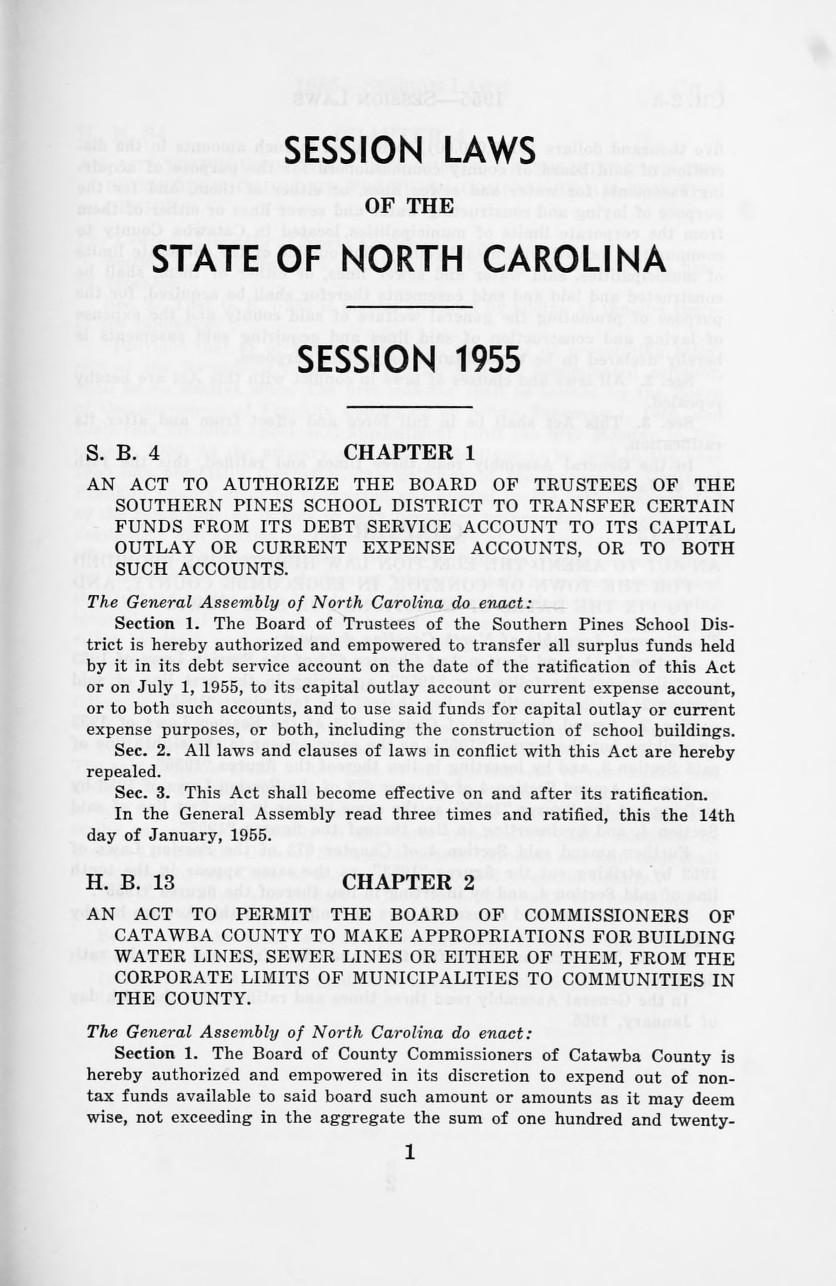

In [5]:
from PIL import Image

import pytesseract

# Open the original image file.
file = Image.open("sessionlawsresol1955nort_0057.jpg")

# Use the Image.convert function to change the original file to black & white.
# The mode "1" below will return a 1-bit per pixel image.
# Change this to "L" to create an 8-bit per pixel image.
binarized_file = file.convert("L")

# Save the new grayscale image file.
binarized_file.save("sessionlawsresol1955nort_0057_binarized.jpg")

display(binarized_file)

The result ([again saved with this Notebook](sessionlawsresol1955nort_0057_grayscale.jpg)) in our case is less exciting because our image already had dark ink on a light background. Nonetheless, it helps us see more clearly where there might be variations in background color that will interfere with OCR. In this case, a smudge in the top right corner, far from the text, has become much more visible, as has the shadow near the gutter (where the page meets the volume's binding). Gutter shadows can cause problems if there is little margin between the gutter and page text. Tesseract has an [example of a page](https://tesseract-ocr.github.io/tessdoc/ImproveQuality#binarisation) that demonstrates much more dramatically how binarization can reveal shadows on a page.

<img src="images/sessionlawsresol1955nort_0057_grayscale.jpg" width="40%" style="padding-top:20px; margin-bottom:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="Grayscale version of page 57 from the 1955 North Carolina Session Laws." title="Grayscale version of page 57 from the 1955 North Carolina Session Laws." />

#### Dilation and erosion
Finally, there is dilation and erosion. As we can see in our sample page, printers often varied font thickness when they set the text type. Bold might be used for headings while thinner fonts might be used for smaller text. Depending on the print quality, bolded text might have additional ink around it, while thinner text might not have enough ink. Variation in ink thickness can throw Tesseract off, so **eroding bolded text** (making it thinner) and **dilating very thin text** (adding thickness) can help address this issue.

Performing erosion and dilation in Python requires some additional understanding of image processing. We won't cover it here (and our samples don't need it!), but [this GeeksForGeeks tutorial](https://www.geeksforgeeks.org/erosion-dilation-images-using-opencv-python/) explains the basics and provides sample code.

### Performing OCR <a class="anchor" id="performing"></a>
Once you're satisfied with the pre-processing on your sample(s), here's where you run the actual OCR. This part of the process may also be iterative:

1. **Apply your chosen [pre-processing](#pre-processing) adjustments** to your entire corpus.
2. **Run OCR** on your entire corpus.
3. **Pull samples from your output to review.** Do you notice any recurring or new errors? If so, you may need to return to pre-processing to assess and address these errors.
4. **Repeat steps 1-3 as needed.** If you have a very large corpus, you may consider running these steps in batches and iterating through each batch.

### The Code

Let's review the code from [Lesson 01](1-WhatIsOCR.ipynb).

First, we need to check that tesseract is installed:

In [ ]:
# Install tesseract on Binder.
# The exclamation runs the command as a terminal command.
# This may take 1-2 minutes.
# Source: Nathan Kelber & JStor Labs Constellate team.
!conda install -c conda-forge -y tesseract

The following let's us OCR 1 image and display the output in Jupyter Notebooks:

In [ ]:
# Import the Image module from the Pillow Library, 
# which will help us access the image.
from PIL import Image

# Import the pytesseract library, which will run the OCR process.
import pytesseract

# OPTIONAL: Specify OEM & PSM configurations. 
# 3 is the default setting for both.
custom_oem_psm_config = r'--oem 3 --psm 3'

# Open a specific image file, convert the text in 
# the image to computer-readable text (OCR),
# and then print the results for us to see here.
print(pytesseract.image_to_string(Image.open("sessionlawsresol1955nort_0057.jpg"), lang="eng"))

This code lets us OCR 1 image and save the output as a file:

In [ ]:
# Name the image file. (Assign it to a variable.)
# You can change the filename in quotes below to OCR a different file.
file = "sessionlawsresol1955nort_0057.jpg"

# Open the file named above. 
# While it's open, do several things:
with open(file, 'rb') as inputFile:
        
    # Read the file using PIL's Image module.
    img = Image.open(inputFile)

    # Run OCR on the open file.
    ocrText = pytesseract.image_to_string(img, lang="eng")
        
    # Get a file name--without the extension-- 
    # to use when we name the output file.
    fileName = file.strip('.jpg')

# The image file above will be closed before moving on to this line.
# The OCR'ed text has been pulled from the image and stored in
# a Python variable for us to continue to use.

# Create and open a new text file, name it to match its input file,
# declare its encoding to be UTF-8 so that it correctly outputs
# non-ASCII characters,
with open(fileName + ".txt", "w", encoding="utf-8") as outFile:
        
    # and write the OCR'ed text to the file.
    outFile.write(ocrText)

# Display a message to let us know the file has been created
# and the script successfully completed.
print(fileName, "text file successfully created.")

But we're planning to OCR a bunch of pages. Can we use 1 script to do that automatically? YES.

In [ ]:
# Import os, a module for file management.
import os

# Import re, a module that we can use to search text.
import re

# Import glob, a module that helps with file management.
import glob

# Open the file folder where our sample pages are stored.
# Look only for the files ending with the ".jpg" file extension.
sampleFilePath = glob.glob("sample/*.jpg")

# Create a folder for the volume in the output directory (/sample).
outDir = "sample_output"
newDir = os.path.normpath(outDir)

# If you're running this script a second or third time, the sample_output folder will 
# already exist. 
# The following statement checks whether it already exists and then creates the
# sample_output folder if it doesn't exist (e.g. if the statement below is False).
if os.path.exists(newDir) == False:
    os.mkdir(newDir)

# Adding a "/" after newDir ("sample_output") makes it into a file path that
# we'll use to move our output file to the correct folder later in this script.
newDir = newDir + "/"
    
# For each file in the sample folder:
for file in sampleFilePath:
    
    # Open a file.
    with open(file, 'rb') as inputFile:
        
        # Read the file using PIL's Image module.
        img = Image.open(inputFile)
    
        # Run OCR on the open file.
        ocrText = pytesseract.image_to_string(img, lang="eng")
        
        # Get a file name -- without the extension -- to use when we name the output file.
        fileName = file.strip('.jpg')
        
        # The current file name also includes its folder name (sampleFilePath, "sample/").
        # We want to store our text output files in a different folder so that we can use 
        # them in future without altering the original image files. The following two 
        # lines use the re module to rename the path from "sample/" to "sample_output/",
        # which also changes the final destination for our next text file.
        currentFolder = "sample/"
        fileName = re.sub(currentFolder, newDir, fileName)

        # Create and open a text file, name it to match its input file,
        # and write the OCR'ed text to the file.
        with open(fileName + ".txt", "w") as outFile:
            outFile.write(ocrText)
        
        print(fileName, " successfully created.")
    
    # Loop back to check for another image file, run OCR on that file, 
    # and write its OCR to a new output file. When no more files remain,
    # this loop will end, and the script will be finished.

Let's look at our [output](sample_output).

*If we wanted to, we could rework this script to iterate over multiple folders...how might we combine some of the code from the earlier pdf2image process with this script to do that?*

### "Cleaning" OCR (Post-Processing) Overview <a class="anchor" id="post-processing"></a>

**This part of the process is often best performed with a combination of manual (human) and automated (computer) steps.** This is where you may be addressing not only errors in the OCR itself but also issues with the original printing, as we describe below with regard to [hyphenated words at the end of lines](#hyphens). As with pre-processing, how complex you make iterations in this phase depends on your corpus and your resources:

1. **Review the OCR output.** Take an initial look at the OCR text files. Sometimes even just a glance will give you a sense of how well the process has gone. If you see a lot of errors, return to the [pre-processing](#pre-processing) questions and consider which steps you might take to improve the OCR output.


2. **Run a spellchecker & calculate the quality of the OCR output.** Use a spellchecker to get a sense of just how accurate the OCR process may have been. Note that spellchecking here, as with spellchecking in software such as Word, is really looking for known and unknown words.


3. **Use Python to check for and correct possible recurring & unique spelling errors.** These are errors that appear frequently and may be caused by the typescript, hyphenation at the end of lines, or other patterns that Tesseract repeatedly misinterprets. This step should focus on common words and avoid proper nouns (unless you have a full list of proper nouns to draw from). As with any automated step, it's possible that new errors will be introduced here. If there is a known and small quantity of proper nouns used in individual texts or across the corpus, and these are consistently "read" incorrectly by Tesseract, it may be possible to use Python to correct these.


4. If your corpus is small enough and/or you have a team that can help you, **read through the corpus to manually check for and correct unique errors**. This may be a moment to correct proper nouns. If you have a team, it may be advisable to have texts read and corrected by multiple team members. It will be important that these team members have access to both inputs and outputs, and perhaps even lists of proper nouns, to be able to compare the original scans with the computer-readable versions. You may even want to set up a process whereby reviewers can flag words they are not sure about so that another reviewer can provide their opinion so that you and/or another project manager making a final decision on uncertain words.


The above process could be broken down further to address smaller issues incrementally and iteratively. It may also be useful to break your corpus into units of analysis before or during this process to assist with cleaning.

### Post-Processing Step-by-Step

#### 1. Review the OCR output.

Locate the ["sample_output" folder](sample_output) accompanying this tutorial, and take a look at the text files it should now contain. (Note that we have included these files with the tutorial in case you run into trouble running the script above.) Compare them to the [.jpg image files in the "sample" folder](sample). What do you notice?

Now that we've looked at all of the files, look more closely at `sessionlawsresol1955nort_0057.jpg` and `sessionlawsresol1955nort_0057.txt`.

#### 2. Check for misspellings & quality. <a class="anchor" id="hyphens"></a>

Although it appears that this page has been entirely correctly OCR'ed, there are two issues that show up in this text file that we want to address in all of our OCR'ed files:

1. The original printers **broke words at the end of some lines**. For example, `Dis-trict` and, at the very end of the page, `twenty-`. How do we deal with this without removing words that *should* be hyphenated?
2. **How would we know how accurate this simple script might be when applied to the entire volume, or to the entire corpus?** 

In addition to being hyphenated, `Dis-trict` may be misspelled as `Dis-triet` or `Dis-trism` in our output -- is this just one instance, or does this error recur? If it's recurring, we can use Python to fix it across the corpus. This could be more efficient than having to read the entire OCR'ed corpus. A good starting point is to get a sense of just how accurate the OCR process has been, that is **check its readability**, before we start trying to identify and fix spelling errors.

**In the following scripts, we'll look at how to correct misspelling and check for OCR accuracy by generating a readability score.** During this process, we'll remove the hyphens at the end of lines to help us with spellchecking, but we may find that we introduce new issues for the spellcheck.

To begin, there are a number of modules and libraries we need to import (or reimport) to extend Python's functionality:

In [ ]:
# Import PyTesseract and PIL, an image processing library used by PyTesseract, to complete the OCR.
from PIL import Image
import pytesseract

# Import os, a module for file management.
import os

# Import re, a module that we can use to search text.
import re

# Import glob, a module that helps with file management.
import glob

# Import the SpellChecker module, which we'll use to look for likely misspelled words.
from spellchecker import SpellChecker

# Import the word_tokenize module from the nltk ("Natural Language Processing Kit") library.
# NLTK is a powerful toolset we can use to manipulate and analyze text data.
from nltk import word_tokenize


# Also download an NLTK dependency, 'punkt'.
nltk.download('punkt')

# We'll also need the pandas library, which is a powerful toolset for managing data.
# We'll learn more about pandas in the exploratory analysis modules.
import pandas as pandas

# This statement confirms that the above code was run without issue.
print("Modules & libraries imported. Ready for the next step.")

Now we'll set up variables that we'll use to give Python information and structure information that Python returns. These include the location of the original image files and the place we want to store our OCR'ed text, as well as a [spellcheck dictionary](https://pypi.org/project/pyspellchecker/), which we'll extend to include [North Carolina placenames](geonames.txt), and a dataframe (essentially, an empty table) we'll use to structure readability information along with the OCR'ed text.

*Note: The [spellchecker library](https://pypi.org/project/pyspellchecker/) we are using support a limited number of Western languages. English is the default.*

In [ ]:
# Open the file folder where our sample pages are stored.
# Look only for files ending with the ".jpg" file extension.
sampleFilePath = glob.glob("sample/*.jpg")

# Before we loop through each page, we'll augment our spellchecker 
# dictionary to include place names specific to North Carolina. 
# Our script for gathering these place names is available here: 
# https://github.com/UNC-Libraries-data/OnTheBooks/blob/master/examples/adjustment_recommendation/geonames.py

# Load the spellchecker dictionary.
# Replace the language attribute with another 2 letter code
# to select another language. Options are: English - ‘en’, Spanish - ‘es’,
# French - ‘fr’, Portuguese - ‘pt’, German - ‘de’, Russian - ‘ru’.

spell = SpellChecker(language='en')

# Add the place name words from the "geonames.txt" file to the 
# spellchecker dictionary.
spell.word_frequency.load_text_file("geonames.txt")

# We'll use Pandas to create a dataframe (a table) that can hold 
# information about an OCR'ed page and display it in a tabular format.
# This dataframe will start out empty with only its column headers 
# defined. We'll add information to it one page at a time. So each
# row will represent 1 page.
df = pandas.DataFrame(columns=["file_name","token_count","unknown_count","readability","unknown_words","text"])

# This statement confirms that the above code was run without issue.
print("Variables created. Ready for the next step.")

Here is what each column will hold:

- **file_name**: The name for the corresponding image file. For now, this is the only information in the table that identifies where the rest of the information in each row comes from (which page).
- **token_count**: The total number of tokens (words) found in each page.
- **unknown_count**: The number of unknown ("misspelled") words found in each page.
- **readability**: Think of this as the percentage of the page that was readable.
- **unknown_words**: A list of tokens (words or in some cases characters) that were not listed in the spellchecker.
- **text**: The OCR'ed text output from each page. The output here includes all <a href="https://en.wikipedia.org/wiki/Escape_character#JavaScript" target="blank">escape characters</a>, so it may look as if a lot of erronenous characters have been added.

Now we'll remove hyphens from the text, run the spellcheck script, and produce a dataframe (table) of information that will give us a sense of the accuracy of our OCR.

In [ ]:
# For each file in the sample folder:
for file in sampleFilePath:
    
    # Open a file.
    with open(file, 'rb') as inputFile:
        
        # Get a file name--without the extension-- 
        # to use when we name the output file.
        fileName = os.path.split(file)[1]
        
        # Read the file using PIL's Image module.
        img = Image.open(inputFile)
    
        # Run OCR on the open file.
        ocrText = pytesseract.image_to_string(img, lang="eng")
        
        # Join hyphenated words that are split between lines by 
        # looking for a hyphen followed by a newline character: "-\n"
            # "\n" is an "escape character" and represents the 
            # "newline," a character that is usually invisible 
            # to human readers but that computers use to mark the 
            # end/beginning of a line. Each time you press the 
            # Enter/Return key on your keyboard, an invisible "\n" 
            # is created to mark the beginning of a new line.
        ocrText = ocrText.replace("-\n","")
        
        # Now we'll check spellings and insert corrections!
        
        # First, we'll use NLTK to "tokenize" text. 
            # "Tokenize" here means to take a page of our OCR'ed text,
            # which Python is currently reading as one big glob of data,
            # and separate each word out so that it can be read as an
            # individual piece of data within a larger data structure 
            # (a list). This process also removes punctuation.
        tokens = word_tokenize(ocrText)
        
        # Next, we'll convert all of those tokens (words) into 
        # lowercase because the spellcheck dictionary is in all 
        # lowercase, and the spellcheck process is case sensitive.
        tokens = [token for token in tokens if token.isalpha()]
        
        # We'll make sure that our text data complies with a universal 
        # text format so that all characters in the data and the 
        # spellchecker can be matched.
        tokens = [token.encode("utf-8", errors = "replace") for token in tokens]
        
        # Now we can get all of the words that don't match the 
        # spellchecker dictionary or our list of place names--
        # these are the potential spelling errors.
        unknown = spell.unknown(tokens)
        
        # Let's use a little math to find out how many potential 
        # spelling errors were identified. As part of this process, 
        # we'll create a "readability" score that will give us a 
        # percentage of how readable each file is--how much of the 
        # OCR'ed is "correct."
        
        # If the list of unknown tokens (words) is greater than 0 
        # (i.e. if the list is not empty):
        if len(unknown) != 0:
            
               # Following order of operations, here's what's happening 
               # in the readability variable below:
               # 1. Divide the number of unknown tokens (len(unknown)) 
                    # by the total number of tokens on the page
                    # (len(tokens)). Use "float" to specify that Python
                    # returns a decimal number:
                        # (float(len(unknown))/float(len(tokens))
               # 2. Multiply the number from step 1 by 100.
                    # (float(len(unknown))/float(len(tokens)) * 100)
               # 3. Subtract the number from step 2 from 100.
                    # 100 - (float(len(unknown))/float(len(tokens)) * 100)
               # 4. Round the number from step 3 to 2 decimal places
                    # round(100 - (float(len(unknown))/float(len(tokens)) * 100), 2)
            
           readability = round(100 - (float(len(unknown))/float(len(tokens)) * 100), 2)
        
        # If the list of unknown tokens is empty (or equal to 0), then readability is 100!
        else:
           readability = 100
    
        # Let's create a record of the readability information 
        # for this page that we'll add to the dataframe. 
        # The following is a Python dictionary, another way of 
        # storing data. Each word or phrase to the left of the : is a
        # "key" -- think of it as a column header. Each piece of 
        # information to the right is a "value" -- information 
        # written in a single cell below each header. 
        # Altogether, this dictionary represents 1 row ("imgRecord") 
        # in a table (or dataframe).
        imgRecord = {
                "file_name" : fileName,
                "token_count" : len(tokens),
                "unknown_count" : len(unknown),
                "readability" : readability,
                "unknown_words" : list(unknown),
                "text" : ocrText
                }
        
        # Here's where we'll add all the information we gathered in 
        # imgRecord as a row in our dataframe.
        df = df.append(imgRecord, ignore_index=True)

        
        # This statement lets us know if a page has been successfully 
        # checked for readability.
        print(fileName, "checked for readability.")
    
# This time, instead of creating individual .txt files for each page,
# we're going to save all of the OCR'ed text and readability 
# information to a single .csv ("comma separated value") file. 
# We can view this file format as a table. Having everything stored 
# like this will help us with clean up and future analysis.
df.to_csv(r'sample_output/sample_output_spellchecked.csv', header=True, index=True, sep=',')

# We have the data stored in a file now, but we can also 
# preview it here:
df

We can also open [sample_output_spellchecked.csv](sample_output/sample_output_spellchecked.csv) to view the full dataset. (Open in a text editor if possible.) You'll find it in the sample_output folder.

**Let's consider what these columns can tell us:**
- The number of uknown words in each page is low (3 max.), and the readability score for each is near 100. This means that *on each page there are only a few errors that need to be addressed.*
- The list of unknown words shows that there are some errors that repeat on all or most pages. These include `ch`, whic is likely the abbreviation for `chapter` that occurs frequently throughout the text. These "errors" can be ignored.
- What else do the columns tell you?


#### 3. & 4. Correcting Errors

Broadly speaking, we can break down errors into two categories: **unique** or **recurring**. We can use Python to address both types to an extent, but it's likely that some manual review will still need to be done to ensure the highest quality OCR. Whether and how much manual review can be done will depend on the project's resources.

##### Unique Errors

There are at least **two ways to address unique computer-identified errors:**

1. Since we produced a list of unknown words in our readability test, we could simply open each file in a text editor and use find-and-replace functionalities (Command + F or Control + F) to locate and replace instances of unique errors.



2. We could use a little Python to find and replace these errors across the corpus. 

*Caveat: There may be instances where variant spellings are identified as "unknown" (misspelled) but are true representations of the word as it was originally printed. It may be necessary to check these misspellings against the scanned pages and decide whether or not to correct the text in the OCR output.*

The following script runs through the entire sample output (and could be applied to an entire corpus) and checks for and replaces instances of a unique:

In [ ]:
# Import glob, a module that helps with file management.
import glob

# Identify the sample_output file path.
# Remember that our readability output is also stored 
# in this file as a .csv. We don't want to change it, 
# so we'll use glob to look for only .txt files.
filePath = glob.glob("sample_output/*.txt")

# Apply the following loop to one file at a time in filePath.
for file in filePath:
    
    # Open a file in "read" (r) mode.
    text = open(file, "r")
    
    # Read in the contents of that file.
    text = text.read()
    
    # Find instances of and unknown word and replace
    # with a known word.
    
    unknown_word = "commissiuner"
    
    known_word = "commissioner"
    
    word_correction = text.replace(unknown_word, known_word)
    
    # Close the file.
    # file.close()
    
    # Reopen the file in "write" (w) mode.
    file = open(file, "w")
    
    # Add the changed word into the reopened file.
    file.write(word_correction)
    
    # Close the file.
    file.close()

print("All instances of " + unknown_word + " replaced with " + known_word + ".")

Check the [sample_output files](sample_output) for the unknown word to see if the word is still present. 

We've done this for one word at a time, but we could use the list of unknown words generated to create a script that runs through the list and corrects each instance all at once--rather than running the above script for each correction individually.

##### "Errors" that computers don't notice.

There may be times when computers don't recognize errors that humans will notice (hence the need for manual review). When this happens, we can use Python to search for and correc those errors. Here's an example from [sessionlawsresol1955nort_0057](sessionlawsresol1955nort_0057.txt):

`The General Assembly 0/ Alarm Carolina do amt:`

In the above there are several errors, but let's focus on `Alarm`, which should be `North`. We can use the same script we used above to fix this error, but we want to avoid changing correct uses of the word "alarm" to "north." *What can we do to ensure we only change usages such as the above?*

##### Recurring Errors & Changes

There are several kinds of recurring errors:

- Specific Words & Phrases (if a unique mispelling above is present consistently across the corpus, for example).
- Word, Phrase, or Character Patterns (for example, a hyphen used to break up a word at the end of a line).

We looked earlier at how to remove hyphens at the end of lines. To do this we replaced `-\n` with nothing (""). We saved that change to spellcheck csv, but we could have written that to the original text files. We could use the above script to make that change directly in the original output files, though it may be advisable to *keep the original text output files separate from the corrected versions in case you need to refer back.*

We could also use the below script in combination with [regular expressions](https://en.wikipedia.org/wiki/Regular_expression) to correct issues that we know are recurring. For example, a look at the [sample documents](sample) reveals that the following line occurs at the beginning of each chapter:

`The General Assembly of North Carolina do enact:`

The OCR has read this line in various ways. We could attempt to use regular expressions to identify these variations and change them all to match the above using some version of the following regular expression:

`\n\nThe General Assembly.*?t:\n\n`

**Be careful when attempting changes with regular expressions**--these always come with the risk of introducing new errors. To avoid as many as possible, make your regular expression as specific as possible.

In [ ]:
# Import the regular expressions module (re), 
# which helps us use regex in Python.
import re

# Import glob, a module that helps with file management.
import glob

# Identify the sample_output file path.
# Remember that our readability output is also stored 
# in this file as a .csv. We don't want to change it, 
# so we'll use glob to look for only .txt files.
filePath = glob.glob("sample_output/*.txt")

# Save the pattern for a chapter header (even pages) that we 
# want to search each page for. We've added "^" to our regular 
# expressions to be extra sure that Python searches only at the 
# beginning of each file.
regex_search = re.compile("\n\nThe General Assembly.*?t:\n\n")

# Save the text that we want to use to correct the OCR output.
replacement = "\n\nThe General Assembly of North Carolina do enact:\n\n"

# Apply the following loop to one file at a time in filePath.
for file in filePath:
    
    # Create a file name for a new output file.
    
    # First, get the existing file name 
    # (e.g. "sessionlawsresol1955nort_0066.txt")
    # & remove the file extension.
    outFileName = file.strip(".txt")
    
    # Then, concatenate (add) the existing file name with additional
    # information ("_noheader") and the file extension to create a
    # new name (e.g. "sessionlawsresol1955nort_0066_noheader.txt").
    outFileName = outFileName + "_corrected.txt"

    # Create and open a new "outFile" to save our results to.
    # "w" tells Python that we plan to write to this file.
    outFile = open(outFileName, "w")
    
    # Open a file in "read" (r) mode.
    inFile = open(file, "r")
    
    # Read in the contents of that file.
    inFile = inFile.read()
    
    # Search inFile for the the regular expression.
    if re.search(regex_search, inFile):
        
        # If the regex search is found,
        # print a statement to let us know that there is a match.
        print(outFileName, "Match found.")
        
        # Substitute the regex_search for the replacement phrase
        # and write the updated contents of inFile to outFile.
        outFile.write(re.sub(regex_search, replacement, inFile))
    
    # If neither the regex search is not found,
    else:
        
        # print a statement to let us know that no matches were found.
        print(outFileName, "No match found.")
        
        # And write all of the contents from the inFile to the outFile.
        outFile.write(inFile)
    
    # Close the current outFile and move to the next file.
    outFile.close()
    
# The loop will finish when Python has gone through all files in 
# the sample_output folder.

## Before We Go
---

Post to Slack #intro-to-ocr 1-2 questions that have come up for you as a result of today's lesson.

## Homework <a class="anchor" id="homework">
---

1. Choose one of the following projects:
    - [Quantifying Kissinger](https://blog.quantifyingkissinger.com/)
        - [Sources and Process](https://blog.quantifyingkissinger.com/category/methods/sources-and-process/)
    - [TROVE](https://trove.nla.gov.au/)
        - [OCR Overview](https://www.nla.gov.au/content/ocr-overview)
        - [Blog post: Australian Newspapers Digitisation Program - The OCR process](https://www.nla.gov.au/stories/blog/behind-the-scenes/2010/05/28/australian-newspapers-digitisation-program-the-ocr-process)
    - [Viral Texts](https://viraltexts.org/2015/05/22/computational-methods-for-uncovering-reprinted-texts-in-antebellum-newspapers/) -- skim and Command+F or Control+F for "OCR"


2. Read through the project's methods.


3. As you read, consider the following questions:
    - What is the project's goal?
    - How does the project team structure its OCR process?
    - What is one useful step or approach that the team includes in their OCR process?
    - What is one less useful step or approach that the team includes in their OCR process? Or, what is one step that is missing?
    - How do the useful, less useful, and/or missing steps or approaches impact the project?


4. Post reflections on these questions and the project you chose in Slack #intro-to-ocr.